# Plotting PyPSA results (simplified version 4-nodes clustering and 1 year data - Bolivia)

In [1]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 1 folder(s) up.


In [2]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

# Load all networks

In [3]:
# add_electricity_network = os.getcwd() + '/networks/elec.nc'
# n_add_el = pypsa.Network(add_electricity_network)

# clustered_network = os.getcwd() + '/networks/elec_s_20.nc'
# n_cluster = pypsa.Network(clustered_network)



#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

solved_network = os.getcwd() + "/results/networks/elec_s_4_ec_lcopt_Co2L-1H.nc"

base_network= os.getcwd() +  "/networks/base.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_base= pypsa.Network(base_network)

n_solve = pypsa.Network(solved_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


# Base network

In [4]:
n_base

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 155
 - Line: 161
 - Transformer: 39
Snapshots: 8760

(<matplotlib.collections.PatchCollection at 0x2de8ea37670>,
 <matplotlib.collections.LineCollection at 0x2de8eb26890>)

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


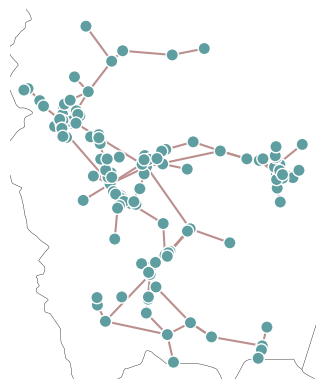

In [5]:
n_base.plot()

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


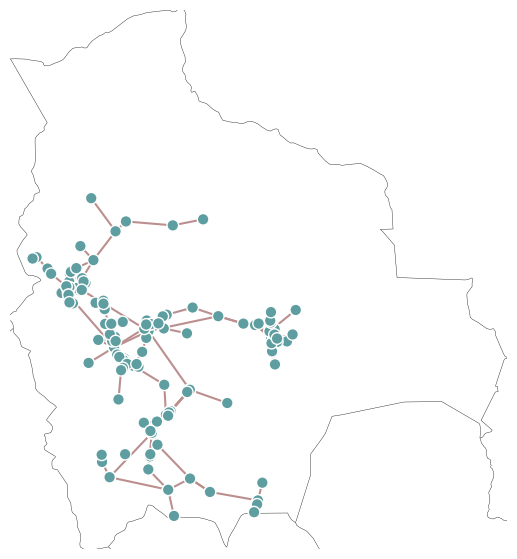

In [6]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#countries = ["Bolivia"]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_base.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


### Conections between buses 

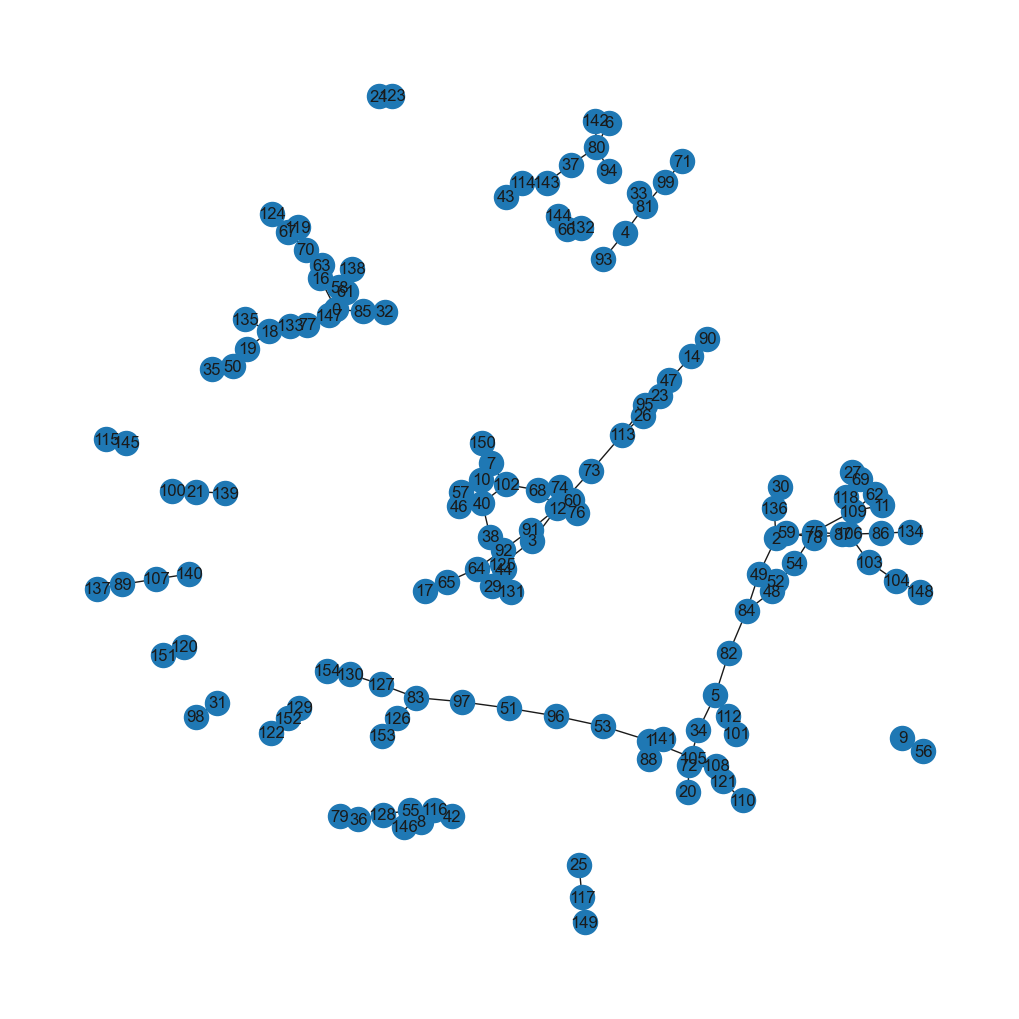

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 2,
    'width': 3,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    pos[i] = [df_buses.lon[i], df_buses.lat[i]]



pos = nx.shell_layout(G)

plt.figure(figsize=(10, 10))
fig1 = nx.draw(G, with_labels=True)

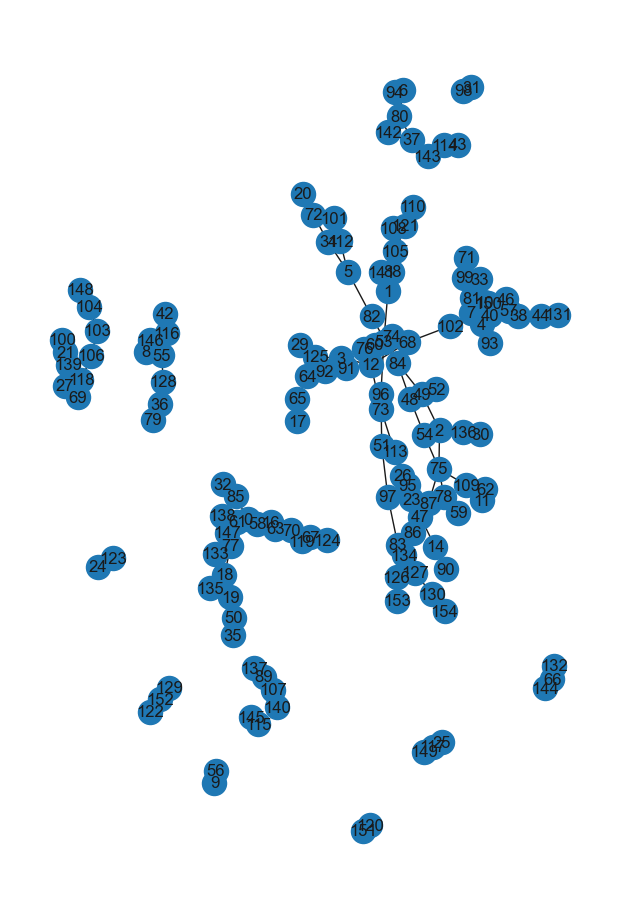

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 1,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    node_id = i
    latitude = df_buses.lat[i]
    longitude = df_buses.lon[i]
    pos[node_id] = [latitude, longitude]



pos = nx.shell_layout(G)

plt.figure(figsize=(6, 9))
fig1 = nx.draw(G, with_labels=True)

# Solved network

### General info

In [9]:
n = n_solve
n

PyPSA Network
Components:
 - Bus: 12
 - Carrier: 16
 - Generator: 24
 - GlobalConstraint: 1
 - Line: 3
 - Link: 16
 - Load: 4
 - StorageUnit: 3
 - Store: 8
Snapshots: 8760

In [10]:
# ".global_constraints" muestra las restricciones consideradas para el modelo (en el config.yaml solo se tomo en cuenta el limite de emisiones) tonCO2/year

n.global_constraints

,sense,constant,mu,type,investment_period,carrier_attribute
GlobalConstraint,,,,,,
CO2Limit,<=,77500000.0,0.000026,primary_energy,NaN,co2_emissions


In [11]:
# estimation of the total emissions from the system in MtonCO2:

emissions = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions) # t/h

#snapshot_weightings provides the number of agregation used for each time step considered (4 hours in this case) and @ ins a multiplier
n.snapshot_weightings.generators @ emissions.sum(axis=1).div(1e6) # Mt


1.9095822806608123

In [12]:
##### check why the value does not appear 
#   - It seems that while the model run before, due to restrictions on simulation, proper solving wasn't possible (by increasing tolerances of the solver the model gets actual results)
# Eur/Year

n.objective

603582441.0335237

In [13]:
# Calculo del precio promedio de energia promedio en la red (costo total de operacion)
# Costo promedio de energia = (costos acumulados durante el periodo de analisis) /  [(sumatoria de las cargas variables en el tiempo)*(horas consideradas en cada time frame)

print("Costo total " + str(n.objective))
print("demanda total " + str(n.loads_t.p.sum().sum()*1))

(n.objective)/(n.loads_t.p.sum().sum()*1)

Costo total 603582441.0335237
demanda total 20264584.40994869


29.785088547742486

In [14]:
#promedio del costo marginal en los buses y a lo largo del año

n.buses_t.marginal_price.mean(axis = 1).mean()   ####   .plot(kind = "area")

38.53899820606839

In [15]:
n.buses_t

{'v_mag_pu_set': Empty DataFrame
 Columns: []
 Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00, 2013-01-02 00:00:00, 2013-01-02 01:00:00, 2013-01-02 02:00:00, 2013-01-02 03:00:00, 2013-01-02 04:00:00, 2013-01-02 05:00:00, 2013-01-02 06:00:00, 2013-01-02 07:00:00, 2013-01-02 08:00:00, 2013-01-02 09:00:00, 2013-01-02 10:00:00, 2013-01-02 11:00:00, 2013-01-02 12:00:00, 2013-01-02 13:00:00, 2013-01-02 14:00:00, 2013-01-02 15:00:00, 2013-01-02 16:00:00, 2013-01-02 17:00:00, 2013-01-02 18:00:00, 2013-01-02 19:00:00, 2013-01-02 20:00:00, 

### Spatial temporal resolution

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


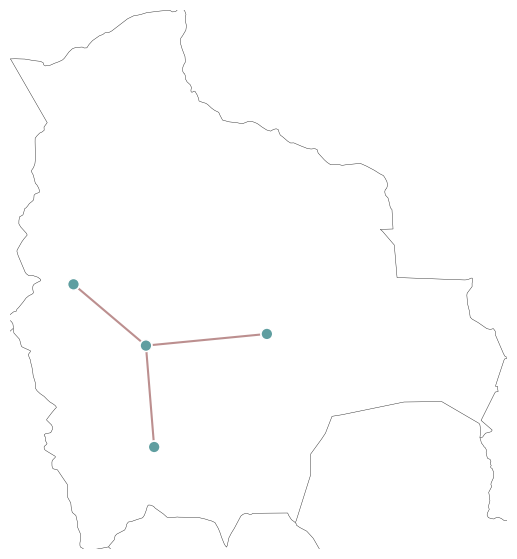

In [16]:
#Resultado grafico de la red electrica ideal (lineas verdes representan expansiones de la red)

#####beacuase all buses are not connected it might be that the problem is not fully solved 
# - Lines used in the model don't consider newer power lines (data bases were not apdated)
# - This is proved by comparing raw lines (all available lines in OSM) and clean lines (processed lines to be used in the model)
# - A linker is required to include new/additional data into the "all_clean_lines.geojson"

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [17]:
n.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-66.283881,-17.925590,Slack,BO 0 OCGT,AC,,None,1.0,0.0,inf,
BO 1,220.0,BO,-63.342093,-17.641643,PQ,,AC,,None,1.0,0.0,inf,
BO 2,220.0,BO,-66.083608,-20.391908,PQ,,AC,,None,1.0,0.0,inf,
BO 3,220.0,BO,-68.046138,-16.434300,PQ,,AC,,None,1.0,0.0,inf,
BO 0 H2,1.0,BO,-66.283881,-17.925590,Slack,,H2,,None,1.0,0.0,inf,
BO 1 H2,1.0,BO,-63.342093,-17.641643,Slack,,H2,,None,1.0,0.0,inf,
BO 2 H2,1.0,BO,-66.083608,-20.391908,Slack,,H2,,None,1.0,0.0,inf,
BO 3 H2,1.0,BO,-68.046138,-16.434300,Slack,,H2,,None,1.0,0.0,inf,
BO 0 battery,1.0,BO,-66.283881,-17.925590,Slack,,battery,,None,1.0,0.0,inf,


In [18]:
#Se muestra el tamaño de la resolucion temporal del modelo - timesteps 
# - Currently the system is working with a toy version of Bolivia to allow faster solving times (4h time aggregation and a little over 5 months acoording the rules in the config.yaml file) 
# - A more complete model should be run eventually with different conditions (higher time resolution) or methods like tsam (https://tsam.readthedocs.io/en/latest/mathematicalBackgroundDoc.html)
#  

len(n.snapshots)

8760

### Overview components

In [19]:
#Imprimir la lista de componentes considerados en el dataframe creado

for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 12 entries
Component 'Carrier' has 16 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 3 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 16 entries
Component 'Load' has 4 entries
Component 'Generator' has 24 entries
Component 'StorageUnit' has 3 entries
Component 'Store' has 8 entries


### Energy balance

In [20]:
# ".stores_t" hace referencia a la energia que se puede almacenar en un bus (se usa para definir otras tecnologias como storage)
# - https://pypsa.readthedocs.io/en/latest/components.html#store

n.stores_t.p.sum()

Store
BO 0 H2        -1.705303e-13
BO 1 H2        -3.197442e-14
BO 2 H2         1.080025e-12
BO 3 H2         2.557954e-13
BO 0 battery   -2.486900e-14
BO 1 battery   -6.039613e-14
BO 2 battery    6.039613e-14
BO 3 battery    1.527667e-13
dtype: float64

In [21]:
n.stores_t.p.sum().sum()

1.2612133559741778e-12

In [22]:
# se imprimen todos los generadores considerados en el modelo

##### check if loadshedding is being used in the config.yaml file, at the solving section 
# - load shedding is represented in the model by the inclution on additional "load" generation/generators 

print(type(n.generators))
print(n.generators.columns)
n.generators

<class 'pandas.core.frame.DataFrame'>
Index(['p_nom_max', 'weight', 'p_nom', 'capital_cost', 'efficiency',
       'p_nom_min', 'marginal_cost', 'bus', 'carrier', 'p_nom_extendable',
       'control', 'p_nom_opt', 'sign', 'build_year', 'min_up_time',
       'min_down_time', 'up_time_before', 'down_time_before', 'type',
       'p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'lifetime', 'committable',
       'start_up_cost', 'shut_down_cost', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down'],
      dtype='object')


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,carrier,p_nom_extendable,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 OCGT,inf,0.000000,0.000000e+00,47234.561404,0.390,0.0,14.393780,BO 0,OCGT,False,Slack,0.000000e+00,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,4.172096e+05,15333.980338,0.000000e+00,109295.569252,1.000,0.0,0.025399,BO 0,onwind,True,,4.061705e-03,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 ror,inf,422.830000,4.228300e+02,270940.715283,0.900,0.0,0.010689,BO 0,ror,False,,4.228300e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,5.343396e+05,101918.461617,1.004000e+02,50855.958267,1.000,100.4,0.019011,BO 0,solar,True,,6.185535e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,1.236000e+02,84469.122809,0.500,123.6,12.890646,BO 1,CCGT,False,,1.236000e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 OCGT,inf,0.000000,0.000000e+00,47234.561404,0.390,0.0,14.393708,BO 1,OCGT,False,,0.000000e+00,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 biomass,inf,0.000000,9.900000e+01,278015.359506,0.468,99.0,14.968237,BO 1,biomass,True,,9.900091e+01,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 onwind,6.202055e+05,72253.544960,4.500000e+01,109295.569252,1.000,45.0,0.025498,BO 1,onwind,True,,4.500011e+01,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 solar,2.368700e+05,33173.774497,0.000000e+00,50855.958267,1.000,0.0,0.019902,BO 1,solar,True,,2.105611e-02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [23]:
#Imprimir solo los generadores de Bolivia

########this is only necessary if several countries are studied at the same time

idx = ['BO' in x for x in n.generators.index]
n.generators.loc[idx,:].head()

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,carrier,p_nom_extendable,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 OCGT,inf,0.000000,0.00,47234.561404,0.39,0.0,14.393780,BO 0,OCGT,False,Slack,0.000000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,4.172096e+05,15333.980338,0.00,109295.569252,1.00,0.0,0.025399,BO 0,onwind,True,,0.004062,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 ror,inf,422.830000,422.83,270940.715283,0.90,0.0,0.010689,BO 0,ror,False,,422.830000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,5.343396e+05,101918.461617,100.40,50855.958267,1.00,100.4,0.019011,BO 0,solar,True,,618.553450,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,123.60,84469.122809,0.50,123.6,12.890646,BO 1,CCGT,False,,123.600000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [24]:
#Imprimir la suma de potencias nominales de los generadores de Bolivia

idx = ['BO' in x for x in n.generators.index]

print(n.generators.loc[idx,:].p_nom.sum())
print(n.generators.loc[idx,:].p_nom_opt.sum())

4000001034.77
4000003234.646212


In [25]:
# Difference between total load and generation
# losses = n.stores_t

n.generators_t.p.sum().sum() - n.loads_t.p.sum().sum()  # - substract storage losses


1652298.9059226625

### Generator capacity

In [26]:
gen_cap = n.generators.groupby(["carrier"]).sum()
# gen_cap.to_csv('capacities_by_carrier.csv',index=False)
gen_cap


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\278006981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_cap = n.generators.groupby(["carrier"]).sum()


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,NaN,0.000000,1.236000e+02,168938.245618,1.000,123.6,25.781448,0,1.236000e+02,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
OCGT,NaN,0.000000,0.000000e+00,141703.684213,1.170,0.0,43.181768,0,0.000000e+00,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
biomass,NaN,0.000000,9.900000e+01,556030.719012,0.936,99.0,29.934932,2,9.902782e+01,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
geothermal,inf,0.000000,5.500000e+01,334431.013779,0.239,55.0,0.010510,1,1.644039e+03,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
load,NaN,0.000000,4.000000e+09,0.000000,4.000,0.0,4.039481,0,4.000000e+09,0.004,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
oil,inf,0.000000,0.000000e+00,38234.561404,0.393,0.0,130.236175,0,0.000000e+00,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,2.375876e+06,160337.867797,4.500000e+01,437182.277006,4.000,45.0,0.100392,4,4.501284e+01,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
ror,NaN,611.770000,6.117700e+02,812822.145848,2.700,0.0,0.031557,0,6.117700e+02,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
solar,1.869809e+06,330825.566632,1.004000e+02,203423.833068,4.000,100.4,0.079423,4,7.111961e+02,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0


In [27]:
n.stores_t.p.head()

Store,BO 0 H2,BO 1 H2,BO 2 H2,BO 3 H2,BO 0 battery,BO 1 battery,BO 2 battery,BO 3 battery
snapshot,,,,,,,,
2013-01-01 00:00:00,60.706256,0.762952,72.138807,21.480143,16.212875,6.873096,9.894924,9.356923
2013-01-01 01:00:00,62.120489,0.785487,58.080391,20.773095,18.351314,8.031595,10.411498,10.362625
2013-01-01 02:00:00,12.849157,0.833533,10.501218,8.634181,10.683671,6.254334,6.769778,8.319298
2013-01-01 03:00:00,-28.110478,0.040169,-34.343801,-12.105153,0.001059,0.007797,0.001023,0.000986
2013-01-01 04:00:00,-34.460337,0.040181,-38.077725,-15.735880,-5.301572,0.040928,-5.167269,-5.636551


<AxesSubplot:xlabel='snapshot'>

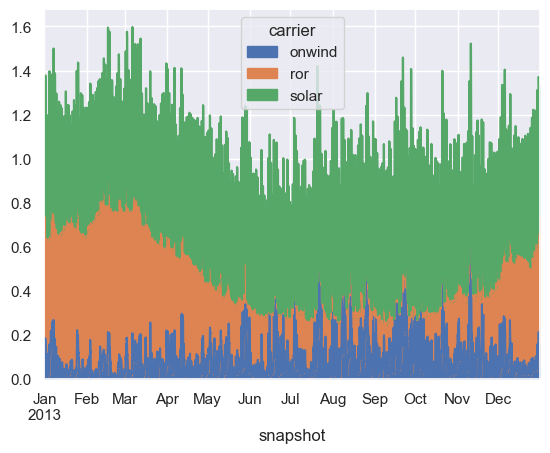

In [28]:
n.generators_t.p_max_pu.groupby(n.generators.carrier, axis=1).mean().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

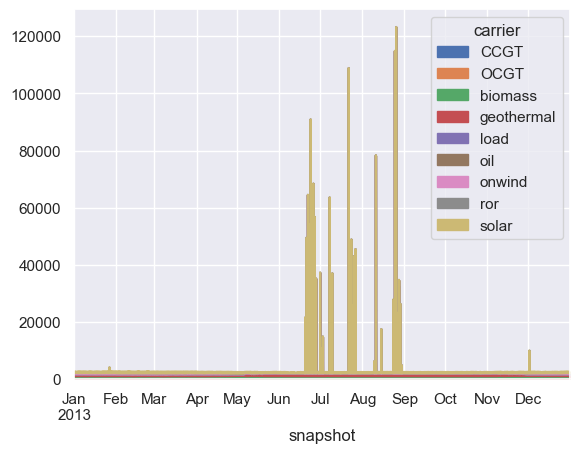

In [29]:
#excluded_carrier = 'load'
#grouped_mean = n.generators_t.p.groupby(n.generators.carrier, axis=1).mean().drop(columns=excluded_carrier)
#grouped_mean.plot(kind='line')

n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

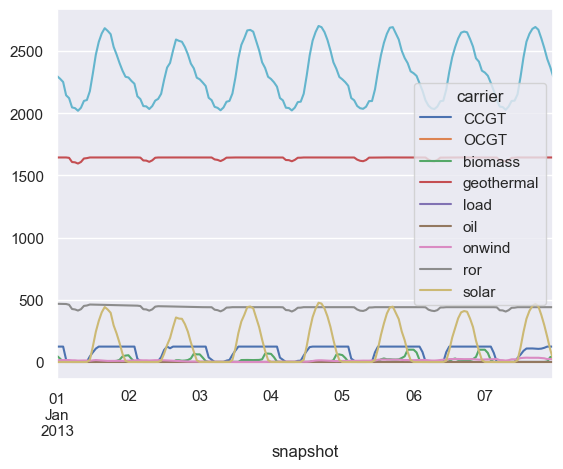

In [30]:
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].plot()
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).mean().plot()

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().plot(kind = "line")

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().sum(axis=1).plot(kind = "line")



In [31]:
# If 0, all renewable capacity potential is used
n.generators.p_nom_max.sum() - n.generators.p_nom_opt.sum()

inf

In [32]:
n.loads_t.p.sum().sum()

20264584.40994869

In [33]:
n.generators_t.p.sum().sum()

21916883.315871354

In [34]:
#### pq la multiplicacion?

n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom.sum()

bus   carrier   
BO 0  OCGT          0.000000e+00
      load          1.000000e+09
      onwind        0.000000e+00
      ror           4.228300e+02
      solar         1.004000e+02
BO 1  CCGT          1.236000e+02
      OCGT          0.000000e+00
      biomass       9.900000e+01
      load          1.000000e+09
      onwind        4.500000e+01
      solar         0.000000e+00
BO 2  CCGT          0.000000e+00
      geothermal    5.500000e+01
      load          1.000000e+09
      onwind        0.000000e+00
      ror           7.550000e+00
      solar         0.000000e+00
BO 3  OCGT          0.000000e+00
      biomass       0.000000e+00
      load          1.000000e+09
      oil           0.000000e+00
      onwind        0.000000e+00
      ror           1.813900e+02
      solar         0.000000e+00
Name: p_nom, dtype: float64

### Lines

In [35]:
n.lines

,bus0,bus1,length,type,s_max_pu,s_nom,capital_cost,num_parallel,s_nom_extendable,s_nom_min,x,r,b,build_year,carrier,x_pu_eff,r_pu_eff,s_nom_opt,v_nom,g,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,BO 0,BO 1,391.342503,Al/St 240/40 4-bundle 380.0,0.7,983.112038,14908.040220,0.578947,True,569.170127,166.284987,20.278657,0.000982,0,AC,0.003436,0.000419,614.017237,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,BO 0,BO 2,343.809330,Al/St 240/40 4-bundle 380.0,0.7,1966.224077,13102.020101,1.157895,True,1138.340255,73.043855,8.907787,0.001726,0,AC,0.001509,0.000184,1775.442045,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,BO 0,BO 3,312.606737,Al/St 240/40 4-bundle 380.0,0.7,983.112038,11914.476515,0.578947,True,569.170127,132.829444,16.198713,0.000785,0,AC,0.002744,0.000335,1018.400185,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [36]:
print(type(n.lines_t))
print(n.lines_t)

<class 'pypsa.descriptors.Dict'>
{'s_max_pu': Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00, 2013-01-02 00:00:00, 2013-01-02 01:00:00, 2013-01-02 02:00:00, 2013-01-02 03:00:00, 2013-01-02 04:00:00, 2013-01-02 05:00:00, 2013-01-02 06:00:00, 2013-01-02 07:00:00, 2013-01-02 08:00:00, 2013-01-02 09:00:00, 2013-01-02 10:00:00, 2013-01-02 11:00:00, 2013-01-02 12:00:00, 2013-01-02 13:00:00, 2013-01-02 14:00:00, 2013-01-02 15:00:00, 2013-01-02 16:00:00, 2013-01-02 17:00:00, 2013-01-02 18:00:00, 2013-01-02 19:0

In [37]:
n.lines_t.p0.max()
n.lines_t.p0.min()

Line
1     174.263292
2   -1242.809096
3     449.737924
dtype: float64

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='snapshot'>

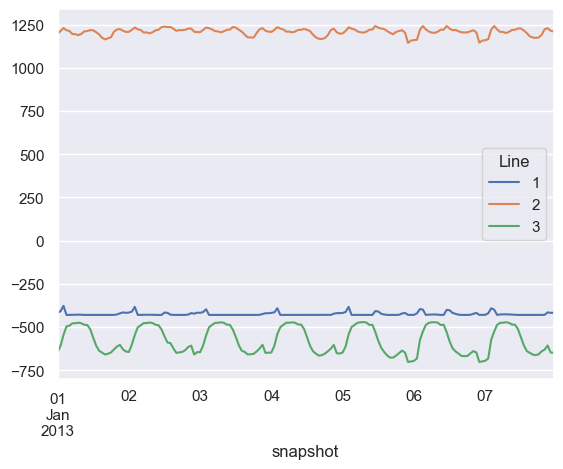

In [38]:
print(type(n.lines_t.p0) and type(n.lines_t.p1))

n.lines_t.p1.loc["2013-01-01":"2013-01-07",:].plot(kind = "line")

### Demand

In [39]:
print(type(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()))

print(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum())

<class 'pandas.core.series.Series'>
bus
BO 0    1.000001e+09
BO 1    1.000000e+09
BO 2    1.000002e+09
BO 3    1.000000e+09
Name: p_nom_opt, dtype: float64


<AxesSubplot:xlabel='snapshot'>

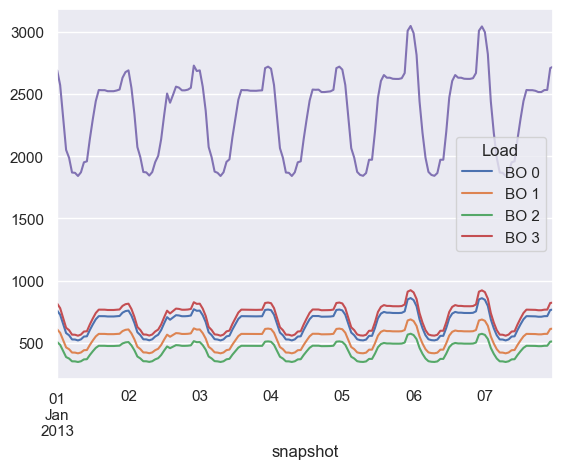

In [40]:
#n.loads_t.p_set.loc["2013-01-01":"2013-12-30","BO0 0"].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()


Load
BO 0    5.722804e+06
BO 1    4.582446e+06
BO 2    3.817456e+06
BO 3    6.141879e+06
dtype: float64
20264584.40994869


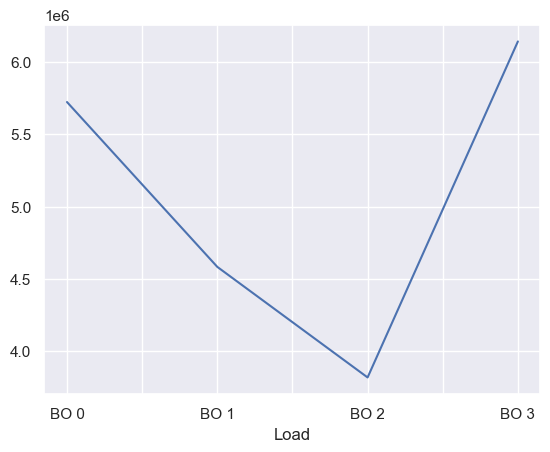

In [41]:
print(n.loads_t.p_set.sum())

n.loads_t.p_set.sum().plot()

print(n.loads_t.p_set.sum().sum())

In [42]:
a = n.loads_t.p_set.sum().rename("load").rename_axis("bus")
a.rename("load", inplace=True)
a.rename_axis("bus", inplace=True)
a

bus
BO 0    5.722804e+06
BO 1    4.582446e+06
BO 2    3.817456e+06
BO 3    6.141879e+06
Name: load, dtype: float64

In [43]:
n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()

###### potencia maxima?
#n.generators.iloc[:, :].groupby(["bus"]).p_max_pu.sum()

bus
BO 0    1.000001e+09
BO 1    1.000000e+09
BO 2    1.000002e+09
BO 3    1.000000e+09
Name: p_nom_opt, dtype: float64

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


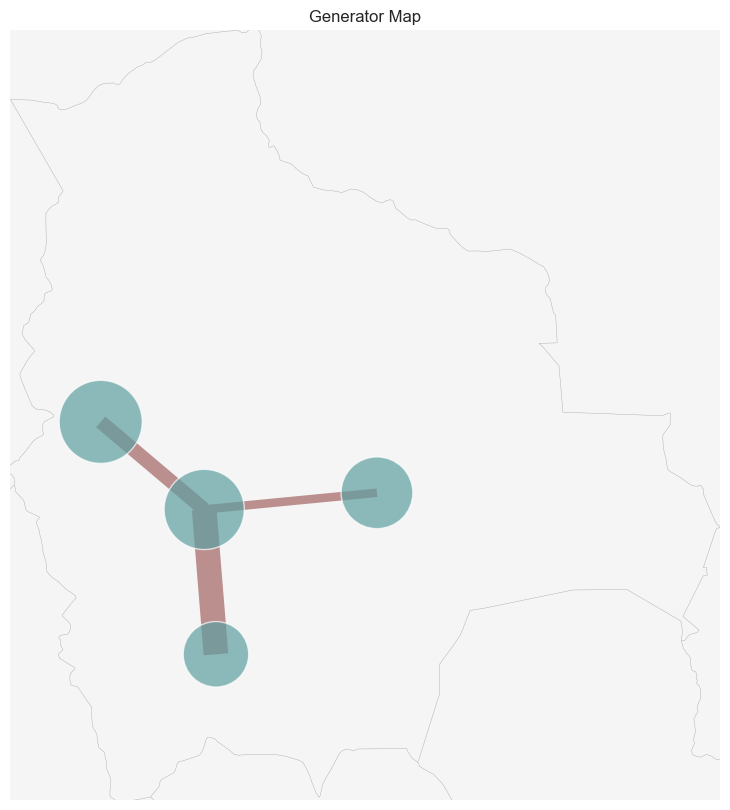

In [44]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={
        "projection": ccrs.PlateCarree()
    },  # PlateCarree(default), Mercator, Orthographic
)

# loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(
    margin=0.1,
    ax=ax,
    geomap=True,  #'10m' leads to a beautiful high resolution map
    projection=None,
    bus_colors="cadetblue",
    bus_alpha=0.7,
    bus_sizes=normalize_node_size(
        n.loads_t.p_set.sum().rename("load").rename_axis("bus")
    )*0.5,  # n.loads_t.p_set.sum().rename("load").rename_axis("bus")*.0000003,
    bus_cmap=None,
    line_colors="rosybrown",
    link_colors="darkseagreen",  # loading
    transformer_colors="orange",
    line_widths=n.lines.s_nom_opt / 1e2,
    link_widths=1.5,
    transformer_widths=1.5,
    line_cmap=None,
    link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
    transformer_cmap=None,
    flow=None,
    branch_components=None,
    layouter=None,
    title="Generator Map",
    boundaries=None,
    geometry=False,
    jitter=None,
    color_geomap=True,
)  # None or True

ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [45]:
# backup
gen_serie = n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
load_serie = n.loads_t.p_set.sum().rename("load").rename_axis("bus")

load_serie = pd.Series(
    load_serie.values,
    index=pd.MultiIndex.from_tuples([(id, "AC load") for id in load_serie.index]),
)

tot_serie = pd.concat([gen_serie, load_serie])  # .groupby(['bus', 'carrier']).sum()

pd.concat([gen_serie, load_serie])

bus   carrier   
BO 0  OCGT          0.000000e+00
      load          1.000000e+09
      onwind        4.061705e-03
      ror           4.228300e+02
      solar         6.185535e+02
BO 1  CCGT          1.236000e+02
      OCGT          0.000000e+00
      biomass       9.900091e+01
      load          1.000000e+09
      onwind        4.500011e+01
      solar         2.105611e-02
BO 2  CCGT          0.000000e+00
      geothermal    1.644039e+03
      load          1.000000e+09
      onwind        5.950787e-03
      ror           7.550000e+00
      solar         9.258798e+01
BO 3  OCGT          0.000000e+00
      biomass       2.690930e-02
      load          1.000000e+09
      oil           0.000000e+00
      onwind        2.722129e-03
      ror           1.813900e+02
      solar         3.366450e-02
BO 0  AC load       5.722804e+06
BO 1  AC load       4.582446e+06
BO 2  AC load       3.817456e+06
BO 3  AC load       6.141879e+06
dtype: float64

### Plot of Average Marginal Price

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


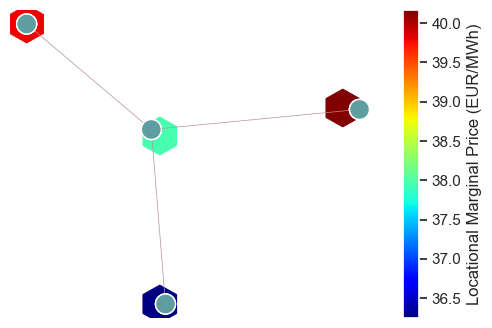

In [46]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

n = n_solve

now = n.snapshots[1800]  ##one specific time

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(7, 4)

n.plot(ax=ax, line_widths=pd.Series(0.5, n.lines.index))
plt.hexbin(
    n.buses.x,
    n.buses.y,
    gridsize=10,
    # C=n.buses_t.marginal_price.loc[now], #at one time (previous set up by scigrid)
    C=n.buses_t.marginal_price.sum()
    / len(n.snapshots[:]),  # Marginal price averaged over the whole year (My version)
    # - shows in which regions electricity will be cheap and where el. intensive companies should be placed.
    cmap=plt.cm.jet,
)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label("Locational Marginal Price (EUR/MWh)")

### Storage

In [47]:
n.stores

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,marginal_cost,build_year,e_nom_opt,type,e_nom,e_nom_min,e_nom_max,e_min_pu,e_max_pu,e_initial,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,standing_loss,lifetime
Store,,,,,,,,,,,,,,,,,,,,,,
BO 0 H2,BO 0 H2,H2,True,True,796.283619,0.009462,0,677.986648,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 1 H2,BO 1 H2,H2,True,True,796.283619,0.010936,0,119.169677,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 2 H2,BO 2 H2,H2,True,True,796.283619,0.009183,0,1135.309540,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 3 H2,BO 3 H2,H2,True,True,796.283619,0.009970,0,656.314267,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 0 battery,BO 0 battery,battery,True,True,15877.883774,0.010464,0,100.185599,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 1 battery,BO 1 battery,battery,True,True,15877.883774,0.009364,0,47.669098,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 2 battery,BO 2 battery,battery,True,True,15877.883774,0.009468,0,64.086124,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 3 battery,BO 3 battery,battery,True,True,15877.883774,0.009560,0,62.121945,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf


<AxesSubplot:xlabel='snapshot'>

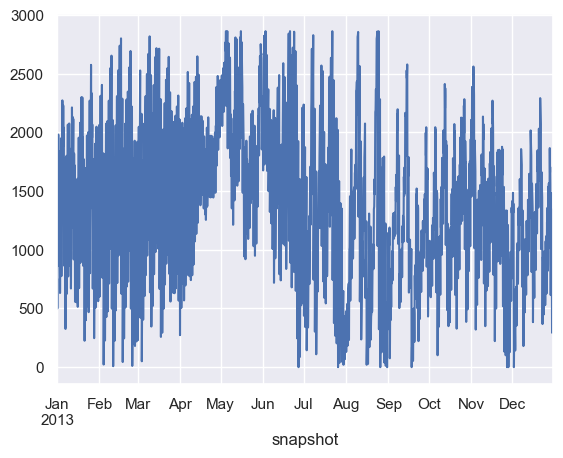

In [48]:
n.stores_t.e.loc["2013-01-01":"2013-12-30"].sum(axis=1).plot()

In [49]:
n.links.iloc[:].groupby(["carrier"]).p_nom_opt.sum()

carrier
H2 electrolysis       116.388136
H2 fuel cell          426.403921
battery charger        87.185644
battery discharger     96.872938
Name: p_nom_opt, dtype: float64

In [50]:
n.stores_t.e.sum()

Store
BO 0 H2         2.853095e+06
BO 1 H2         5.294097e+05
BO 2 H2         4.937392e+06
BO 3 H2         2.729683e+06
BO 0 battery    4.667296e+05
BO 1 battery    2.318708e+05
BO 2 battery    3.161687e+05
BO 3 battery    2.923059e+05
dtype: float64

### Storage_units (hydro reservoir)

In [51]:
n.storage_units

,p_min_pu,efficiency_dispatch,cyclic_state_of_charge,efficiency_store,p_nom,capital_cost,bus,carrier,max_hours,marginal_cost,build_year,p_nom_opt,control,type,p_nom_extendable,p_nom_min,p_nom_max,p_max_pu,p_set,q_set,sign,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 hydro,0.0,0.9,True,0.0,475.80,160627.143522,BO 0,hydro,1300.0,0.009905,0,475.80,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 2 hydro,0.0,0.9,True,0.0,7.46,160627.143522,BO 2,hydro,1300.0,0.009910,0,7.46,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 3 hydro,0.0,0.9,True,0.0,66.06,160627.143522,BO 3,hydro,1300.0,0.009405,0,66.06,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0


<AxesSubplot:xlabel='snapshot'>

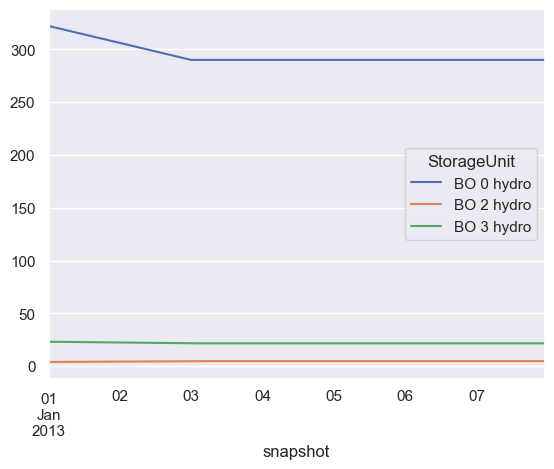

In [52]:

n.storage_units_t.inflow.loc["2013-01-01":"2013-01-07"].plot()

In [53]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-01"].sum(axis=0)

StorageUnit
BO 0 hydro    828.822552
BO 2 hydro     53.868765
BO 3 hydro     49.995558
dtype: float64

<AxesSubplot:xlabel='snapshot'>

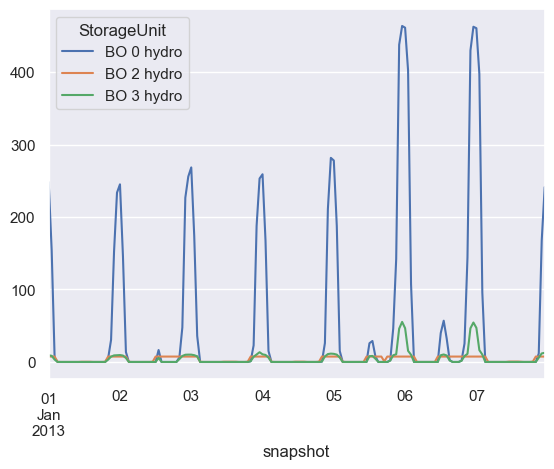

In [54]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].plot()

In [55]:
hydro_serie = n.storage_units.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
hydro_serie

bus   carrier
BO 0  hydro      475.80
BO 2  hydro        7.46
BO 3  hydro       66.06
Name: p_nom_opt, dtype: float64

In [56]:
hydro_serie.sum()

549.3199999999999

In [57]:
n.storage_units_t.p.sum().sum()

1117609.7562762157

# Plot Load + Generators + Storage_Units

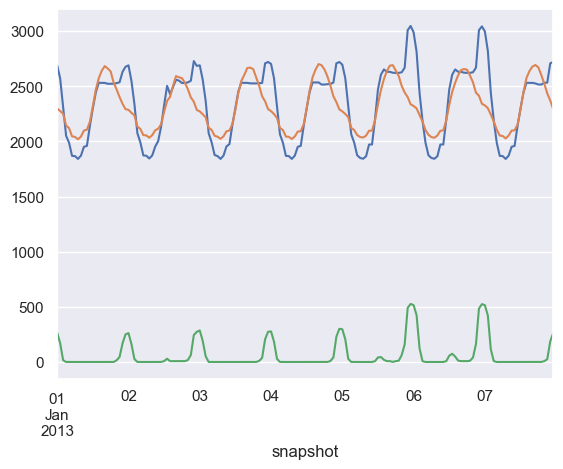

In [58]:
total_load = n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()

gen_units = n.generators_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

res_units = n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

In [59]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                6.219502e-01         2.753125e+07   
            Combined-Cycle Gas     8.560964e-01         1.044038e+07   
            Geothermal             9.975684e-01         5.498178e+08   
            Oil                             NaN         0.000000e+00   
            Onshore Wind           1.478357e-01         4.919704e+06   
            Open-Cycle Gas                  NaN         0.000000e+00   
            Run of River           4.293760e-01         1.657534e+08   
            Solar                  1.916881e-01         3.616856e+07   
            load                   7.220499e-08         0.000000e+00   
Line        AC                     6.397404e-01         4.454938e+07   
Link        H2 electrolysis        3.815821e-01         5.679091e+06   
            H2 fuel cell           8.332312e-02         1.042905e+07   
            battery charger        2.332497e-01         3.357320e+06   
            battery discharger     1.889323e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        2.322526e-01         8.823570e+07   
Store       Battery Storage        5.444354e-01         4.351537e+06   
            Hydrogen Storage       4.872440e-01         2.061403e+06   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                0.000000        9.900000e+01   
            Combined-Cycle Gas     0.000000        1.236000e+02   
            Geothermal             0.000000        5.500000e+01   
            Oil                    0.000000        0.000000e+00   
            Onshore Wind           0.114333        4.500000e+01   
            Open-Cycle Gas         0.000000        0.000000e+00   
            Run of River           5.268972        6.117700e+02   
            Solar                  2.453997        1.004000e+02   
            load                   0.000000        4.000000e+09   
Line        AC                          NaN        3.932448e+03   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        5.493200e+02   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        9.218992e+02      9.902782e+01   
            Combined-Cycle Gas             1.364005e+03      1.236000e+02   
            Geothermal                     1.723629e+01      1.644039e+03   
            Oil                            0.000000e+00      0.000000e+00   
            Onshore Wind                   1.696735e-01      4.501284e+01   
            Open-Cycle Gas                 0.000000e+00      0.000000e+00   
            Run of River                   2.826789e+00      6.117700e+02   
            Solar                          2.609920e+00      7.111961e+02   
            load                           2.915819e+02      4.000000e+09   
Line        AC                                      NaN      3.407859e+03   
Link        H2 electrolysis                0.000000e+00      1.163881e+02   
            H2 fuel cell                   0.000000e+00      4.264039e+02   
            battery charger                0.000000e+00      8.718564e+01   
            battery discharger             0.000000e+00      9.687294e+01   
Load        -     

In [60]:
load_shedding = n.generators_t.p.loc["2013-01-01":"2014-01-01"].groupby(n.generators.carrier, axis=1).sum()["load"]
load_shedding.sum()

2530062.8362193736

<AxesSubplot:xlabel='snapshot'>

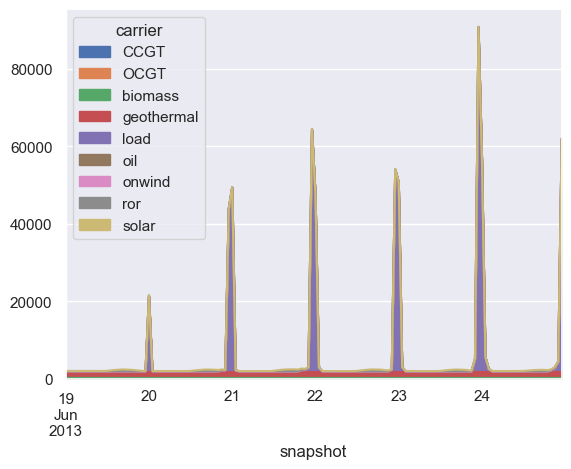

In [61]:

n.generators_t.p.loc["2013-06-19":"2013-06-24"].groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

In [62]:
print("\n")
print("Average cost: "+str(n.objective/n.loads_t.p.sum().sum())+"[€/MWh]")
        

loads=n.generators[n.generators.carrier=="load"]

print("Load carrier (load shedding) : "+str(n.generators_t.p[loads.index].sum().sum()/1e6)+" TWh")

battery=n.stores_t.p.groupby(n.stores.carrier, axis=1).sum()["battery"]

i=0
nbattery = []
pbattery =[]
for i in battery:
    if i < 0:
        nbattery.append(i)
    else:
        nbattery.append(0) 
for i in battery:
    if i > 0:
        pbattery.append(i)
    else:
        pbattery.append(0)

        
        
H2=n.stores_t.p.groupby(n.stores.carrier, axis=1).sum()["H2"]

i=0
nH2 = []
pH2 =[]
for i in H2:
    if i < 0:
        nH2.append(i)
    else:
        nH2.append(0) 
for i in H2:
    if i > 0:
        pH2.append(i)
    else:
        pH2.append(0)
        
n.generators = n.generators[n.generators.carrier != "load"]
n.generators_t.p = n.generators_t.p[n.generators.index]
p_cap_gen=(n.generators.p_nom_opt.sum().sum()+n.storage_units.p_nom_opt.sum().sum())
p_cap_bat=(n.stores.e_nom_opt.sum().sum()/6)
data_p0 = n.links_t.p0
data_p1 = n.links_t.p1


print("Total installed power :"+str(p_cap_gen/1e3)+" GW")
print("Total production : "+str((n.generators_t.p.sum().sum()+n.storage_units_t.p.sum().sum())/1e6) +"TWh")


print("Total energy stored: "+str(np.sum(pbattery)/1e6+np.sum(pH2)/1e6) +"TWh")

print("Total installed power battery: "+str(p_cap_bat/1e3) +" GW")

print("Losts in the batteries:"+ str((data_p0.sum().sum()+data_p1.sum().sum())/1e6)+"TWh")
print("\n")

renewable_carriers = ["onwind", "solar", "ror", "biomass", "geothermal"]
renewable = n.generators[n.generators.carrier.isin(renewable_carriers)]
print("Total production per renewable: "+str(n.storage_units_t.p.sum().sum()/1e6+n.generators_t.p[renewable.index].sum().sum()/1e6) +"TWh")
print("\n")

#print("Production-lost : "+str((n.generators_t.p.sum().sum()+n.storage_units_t.p.sum().sum())/1e6-n.generators_t.p[loads.index].sum().sum()/1e6-(data_p0.sum().sum()+data_p1.sum().sum())/1e6) +"TWh")


print("Percentage of battery installed:"+str(p_cap_bat/p_cap_gen*100)+"%")
print("Total demand : "+str(n.loads_t.p.sum().sum()/1e6) +"TWh")



Average cost: 29.785088547742486[€/MWh]
Load carrier (load shedding) : 2.5300628362193742 TWh
Total installed power :3.7839662121294197 GW
Total production : 20.504430235928197TWh
Total energy stored: 0.44229373998514093TWh
Total installed power battery: 0.47714048335088993 GW
Losts in the batteries:0.24237588768361404TWh


Total production per renewable: 19.5775038341532TWh


Percentage of battery installed:12.609533399675366%
Total demand : 20.264584409948693TWh


<AxesSubplot:xlabel='snapshot'>

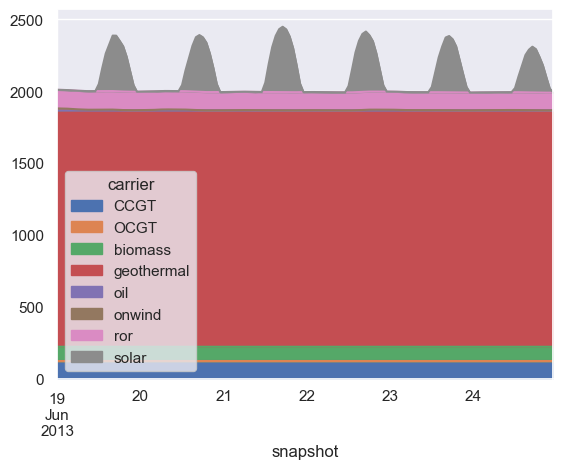

In [63]:

n.generators_t.p.loc["2013-06-19":"2013-06-24"].groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")